# This notebook demonstrates the use of demodulator.py
_________________________

In [1]:
import demodulator as dmod

%matplotlib inline

d = 0.0094 # pickup coil diameter in meters
Nturns = 10 # number of turns in the pickup coil

--------------------------------------

## First, let's look at data from the small pulsed field. 
### Sample data files are:
- **450V_84K** (8MB), containing the TDO and pickup signal as 8 bit unsigned ints (4M points each)
- **450V_84KScale.txt**, containing the oscilloscope scaling factors for channel 1 (TDO) and channel 2 (pickup)
- (This pulse was with a 450V charge on the capacitor bank, with the sample at 85K)

#### First, load the data and calculate field from the pickup signal:

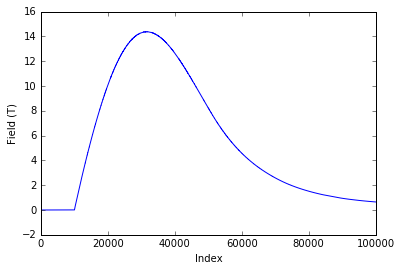

In [2]:
Sfile = r'./ExampleData/450V_84K'
dict_450_84 = dmod.dataload_spf_bin(Sfile)
dict_450_84 = dmod.pu_to_field(dict_450_84, Nturns, d, plot=True)

#### Next, let's demod:
##### (To play around with speed and resolution of demod(), you change change L and/or nstep)
- TDO data has been decimated from 4,000,000 points to 400,000

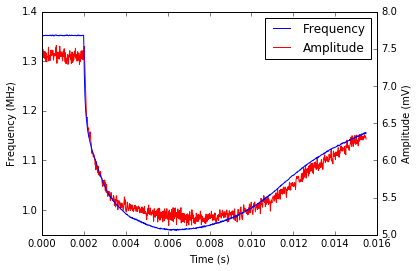

In [3]:
demod_450_84 = dmod.demod(dict_450_84, L=None, nstep=None, plot=True)

#### Now that we have frequency, amplitude, and field vs. time, we can spline fit to look at frequency and amplitude vs. field:
- **if plot**: plot frequency (and amplitude, if amp) vs. field
- **if updown**: split data into up and down sweeps
- **if delta**: look at change in frequency rather than absolute frequency
- **if amp**: also spline fit (and plot, if plot) amplitude

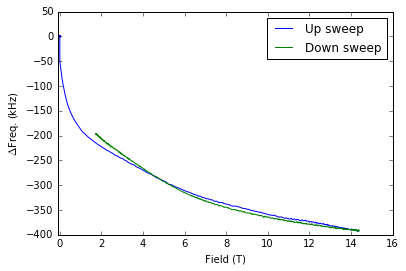

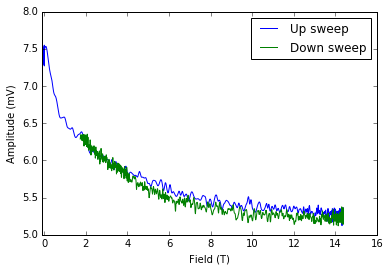

In [4]:
demod_450_84 = dmod.spline_plot(demod_450_84, plot=True, updown=True, delta=True, amp=True)

#### Finally, we can save the data:
- Output file will be called 'file_root_demod.txt'
    - if file_root is None, file_root is set to the name of the original int data file, e.g. 450V_84K
- if tdo_pu: tdo and pickup voltage data will be save in a separate file
    - data will be saved as doubles, the file will be big
- In this case, output file is **450V_84K_demod.txt**

In [5]:
dmod.data_save(demod_450_84, file_root=None, spline=True, tdo_pu=False)

---------------------------------------

## Next, let's look at data taken at LANL:
- We only need to worry about one file here: **s007_012216dat.txt** (60.1MB)
- You wont be able to run this section yourself because I've only included a few lines of this file on GitHub
- TDO data is 2,200,000 points

In [6]:
Lfile = r'./ExampleData/LANL_example.txt'
LANL_dict = dmod.dataload_lanl_csv(Lfile)

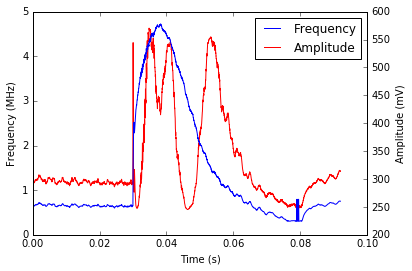

In [7]:
demod_L = dmod.demod(LANL_dict, L=None, nstep=None, plot=True)

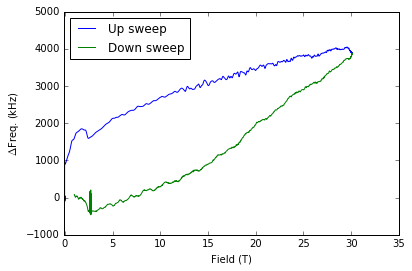

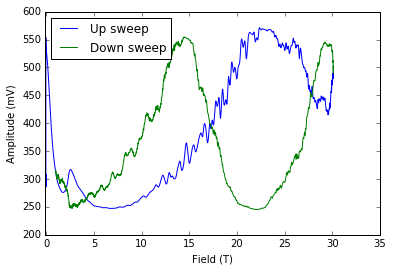

In [8]:
demod_L = dmod.spline_plot(demod_L, plot=True, updown=True, delta=True, amp=True)

#### Save the data if you'd like:
- Output file: **LANL_example_demod.txt**

In [9]:
dmod.data_save(demod_L, file_root=None, spline=True, tdo_pu=False)

---------------------------------------

## Profile:
- Small pulsed field data:
    - **dataload_spf_bin()**: 1604 function calls (1591 primitive calls) in **0.186 seconds**
    - **pu_to_field()**: 48392 function calls (47752 primitive calls) in **0.327 seconds**
    - **demod()**: 221866 function calls (218396 primitive calls) in **3.197 seconds**
        - of which 1.480 seconds was FFT computation
        - TDO data length: 40,000 points after decimation
- LANL data:
    - **dataload_lanl_csv()**: 1681 function calls (1667 primitive calls) in **1.176 seconds**
    - **demod()**: 269520 function calls (266086 primitive calls) in **8.684 seconds**
        - of which 4.312 seconds was FFT computation
        - TDO data length: 2,200,000 points (no decimation)